In [1]:
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import random
import datetime as dt
import copy

In [2]:
shear_filter = pd.read_csv('/Users/samueleckford/Scripts/Shear Prediction/Quads/shear_master_df_Quad 21_2020_06_29.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
shear_filter.head(2)

,DT,GR,RHOB,SP,Wellname,Depth,SPWS,GRWS,NPOWS,CALWS,...,PEFWS,CALI,DTSWS,CAL,DEN,MRES,DTS,DRES,NPO,SRES
0,120.9238,37.3865,2.4670,88.0527,10-1-1,1877.816,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123.2250,36.9812,2.4605,87.4510,10-1-1,1877.968,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
log_dict = {}
# Lists with different log name abbreviations, can be edited as needed
log_dict['GR_list'] = ['GRWS', 'gr', 'GR']
log_dict['DT_list'] = ['DTWS', 'dt', 'dtws', 'DT']
log_dict['DTS_list'] = ['DTSWS', 'DTS', 'dts', 'dtsws']
log_dict['DRes_list'] = ['DRESWS', 'DRES']
log_dict['Mres_list'] = ['MRESWS', 'MRES']
log_dict['Sres_list'] = ['SRESWS', 'SRES']
log_dict['Rhob_list'] = ['DENWS', 'RHOB', 'RHOBWS', 'RHO', 'RHOWS', 'DEN']
log_dict['Npo_list'] = ['NPOWS', 'NPO']
log_dict['Cal_list'] = ['CALWS', 'CAL', 'CALI']
log_dict['PEF_list'] = ['PEFWS', 'PEF']
log_dict['SP_list'] = ['SPWS', 'SP']

In [5]:
from Modules import column_list_merge

In [6]:
#shear_filter2 = shear_filter.copy()
column_list_merge.column_list_merge(shear_filter, log_dict)

gr column does not exist
Number of values added to GRWS column = 7396978
dt column does not exist
dtws column does not exist
Number of values added to DTWS column = 9991271
Number of values added to DTSWS column = 73644
dts column does not exist
dtsws column does not exist
Number of values added to DRESWS column = 19651
Number of values added to MRESWS column = 56868
Number of values added to SRESWS column = 7219
Number of values added to DENWS column = 3615049
RHOBWS column does not exist
RHO column does not exist
RHOWS column does not exist
Number of values added to DENWS column = 3825788
Number of values added to NPOWS column = 12412
Number of values added to CALWS column = 353430
Number of values added to CALWS column = 2889045
Number of values added to PEFWS column = 1711981
Number of values added to SPWS column = 3881750


In [7]:
shear_filter.columns = [col.replace('WS', '') for col in shear_filter.columns]
shear_filter.columns

Index(['Wellname', 'Depth', 'SP', 'GR', 'NPO', 'CAL', 'DRES', 'COND', 'MRES',
       'SRES', 'DT', 'DEN', 'PEF', 'DTS'],
      dtype='object')

In [8]:
well = '13-23a-4'
shear_filter2 = copy.deepcopy(shear_filter)
#shear_filter3 = copy.deepcopy(shear_filter.loc[shear_filter['Wellname']==well])
shear_filter2['DTS'].fillna(450, inplace=True)
#shear_filter.isna().sum()

In [9]:
from Modules import rolling_imputer

In [10]:
### SP has a large proportion of nulls so is dropped
shear_filter.drop(['SP', 'PEF', 'NPO', 'SRES', 'MRES'], axis=1, inplace=True)
### Initially run just the DTS as this is the target log, then on all others
shear_filter = rolling_imputer.rolling_imputer(shear_filter)
for i in shear_filter.columns[3:-1]:
    shear_filter = rolling_imputer.rolling_imputer(shear_filter, log=i)
shear_filter.isna().sum()

0.961 DTS proportion of nulls
0.106 CAL proportion of nulls
0.072 DRES proportion of nulls
0.0 COND proportion of nulls
0.002 DT proportion of nulls
0.021 DEN proportion of nulls


Wellname       0
Depth          0
GR          1385
CAL            0
DRES           0
COND           0
DT             0
DEN            0
DTS            0
dtype: int64

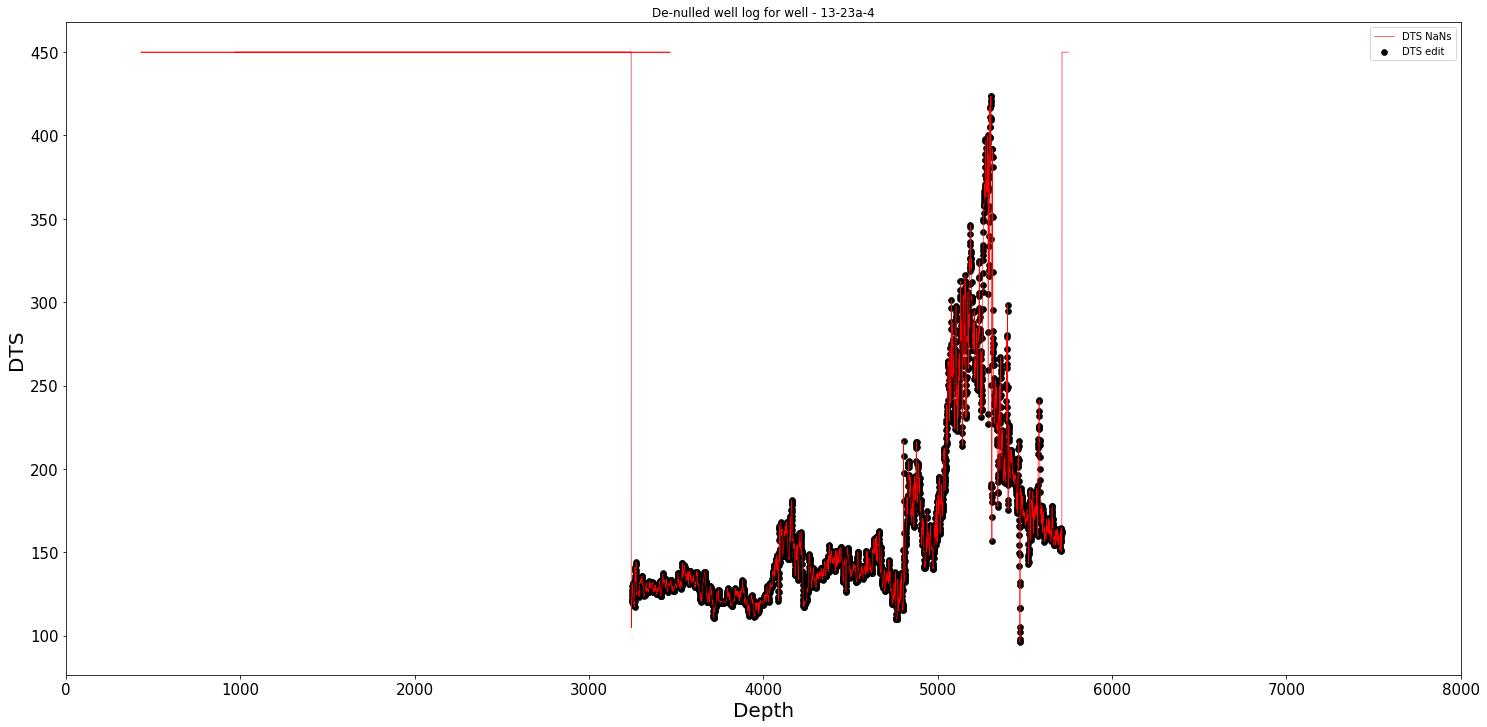

In [11]:
plt.figure(figsize=(25, 12))
well = '13-23a-4'
log = 'DTS'
#plt.scatter(shear_filter3[shear_filter3["Wellname"] == well]["Depth"], shear_filter3[shear_filter3["Wellname"] == well]['test_flag'], s=0.6, color='red', label=log + ' flag ')
plt.plot(shear_filter2[shear_filter2["Wellname"] == well]["Depth"], shear_filter2[shear_filter2["Wellname"] == well][log], linewidth=0.6, color='red', label=log + ' NaNs')
plt.scatter(shear_filter[shear_filter["Wellname"] == well]["Depth"], shear_filter[shear_filter["Wellname"] == well][log], linewidth=0.6, color='black', label=log + ' edit ')
plt.title('De-nulled well log for well - ' + well)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Depth', fontsize = 20)
plt.ylabel(log, fontsize = 20)
plt.xlim(0, 8000)
plt.legend()
plt.show()

In [30]:
shear_filter.to_csv('Quad21_clean.csv')

In [44]:
well_list = list(shear_filter.Wellname.unique())
len(well_list)
well_list

['13-22a-23',
 '13-22c-30',
 '13-23a-4',
 '13-23b-5',
 '13-24a-4',
 '13-30a-4',
 '13-30b-5',
 '14-20b-32',
 '14-26a-6',
 '14-26a-8',
 '14-26b-5',
 '14-28a-3',
 '14-28b-2',
 '14-28b-4',
 '15-17-27',
 '15-18b-10',
 '15-20b-11z',
 '15-20b-15',
 '15-26b-9',
 '15-26d-8',
 '15-28a-8',
 '16-22-7',
 '16-26-29',
 '16-28-12',
 '20-5c-11',
 '20-5d-7',
 '20-6-3',
 '20-7a-6',
 '20-7b-5',
 '20-9-4',
 '204-10-1',
 '204-14-2',
 '204-18-1',
 '204-19-4',
 '204-19-5',
 '204-19-7',
 '204-19-9',
 '204-19a-10',
 '204-20-3',
 '204-20-6',
 '204-20a-7',
 '204-23-2',
 '204-24a-5',
 '204-25b-6',
 '205-1-1',
 '205-12-1',
 '205-14-3',
 '205-17b-2',
 '205-27-2',
 '21-1a-19',
 '21-1a-19y',
 '21-1a-19z',
 '21-1a-20',
 '21-1b-17',
 '21-3a-7',
 '21_5a-6',
 '21-8-3',
 '21-8-4',
 '21-12-3',
 '21-19-6',
 '21-24-6']

In [32]:
random.seed(42)
test_list = random.sample(well_list, int(len(well_list)*0.3))
train_list = [i for i in well_list if i not in test_list]
#print(test_list)

In [33]:
df_test = shear_filter[shear_filter['Wellname'].isin(test_list)]
df_train = shear_filter[~shear_filter['Wellname'].isin(test_list)]

In [34]:
folder_create = os.path.exists("data")
if folder_create is False:
    os.mkdir("./data")
    os.mkdir("./data/train")
    os.mkdir("./data/test")
folder_create = os.path.exists("./data/train")
if folder_create is False:
    os.mkdir("./data/train")
    os.mkdir("./data/test")

In [35]:
target_feature = ['DTS']
train_feature = ['GR', 'DT', 'DRES', 'DEN', 'Depth', 'COND', 'CAL']

In [36]:
X_train = df_train[train_feature].copy()
X_test = df_test[train_feature].copy()

y_train = df_train[target_feature].copy()
y_test = df_test[target_feature].copy()

In [37]:
X_train.to_csv("./data/train/train_x_" + str(dt.datetime.today().strftime('%Y-%m-%d')) + ".csv")
y_train.to_csv("./data/train/train_y_" + str(dt.datetime.today().strftime('%Y-%m-%d')) + ".csv")
X_test.to_csv("./data/test/test_x_" + str(dt.datetime.today().strftime('%Y-%m-%d')) + ".csv")
y_test.to_csv("./data/test/test_y_" + str(dt.datetime.today().strftime('%Y-%m-%d')) + ".csv")